In [4]:
from qiskit import *

## The Deutsch-Jozsa Algorithm
This algorithm solves the problem of determining if a given binary funcion $\{0,1\}^n\rightarrow \{0,1\}$ is balanced or constant. A balanced function is one that has output 1 for precisely half of the input domain.

<!-- There are $2^n$ n-bit functions. Two of these will be constant functions, for outputs 0 and 1. Some of the rest will be balanced. -->

I'll show that the membership of the two classes can be determined using a quantum operation.

### Configurable Oracle

In [13]:
import numpy as np

def build_oracle(balanced:bool, n:int):
    # Generates a balanced or constant oracle for an n-bit binary function
    oracle = QuantumCircuit(n+1,name="Oracle")
    if balanced:
        bits = [np.random.choice([0,1]) for _ in range(n)]
        for qubit_i, bit in enumerate(bits):
            if bit:
                oracle.x(qubit_i)
        for qubit_i, bit in enumerate(bits):
            oracle.cnot(qubit_i, n) 

        for qubit_i, bit in enumerate(bits):
            if bit:
                oracle.x(qubit_i)
    else:
        # constant
        constant_val = np.random.choice([0,1])
        if constant_val == 1:
            oracle.x(n)
    return oracle

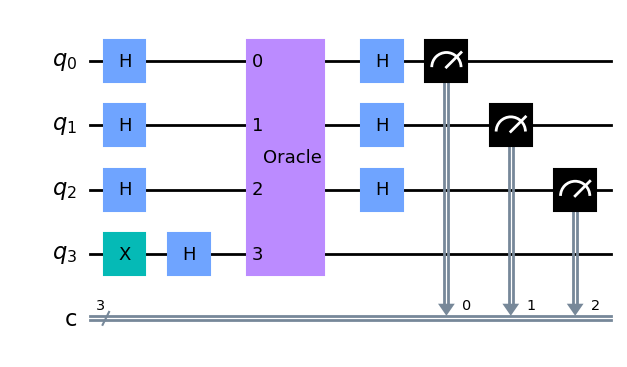

In [19]:
n = int(input("n=...?"))

circuit = QuantumCircuit(n+1,n)
# prepare our initial state: |00> to |01> to |+>|->
circuit.x(n) 
circuit.h(range(n+1))

#Choose an oracle
oracle = build_oracle(balanced=True,n=n).to_instruction()

circuit.append(oracle, range(n+1))

# Hadamard and measure
circuit.h(range(n))
circuit.measure(range(n),range(n))
circuit.draw('mpl')

We can ignore the second qubit. 

After the Oracle, the first qubit `q0` will be in the state $\frac{1}{\sqrt{2}}(\ket{0} + (-1)^{f(0)\oplus f(1)}\ket{1})$.

The key insight is that the $\ket{1}$ term has a coefficient that can flip signs. If the result of $f(0) \oplus f(1)$ is 0, then the coefficient will be positive, otherwise it will be negative.

Considering when $f(0) \oplus f(1)$, we see that this is equal to 1 exclusively when $f(0) \ne f(1)$, i.e. when the function is balanced. This leads to the coefficient being negative.

By applying the Hadamard gate and then measuring, we  measure $\ket{1}$ if and only if the function is balanced.

In [ ]:
from qiskit.visualization import plot_histogram

backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuit, backend))
counts = job.result().get_counts()
plot_histogram(counts)